In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
user_interactions = pd.read_csv("data/user_interactions.csv")
user_demographics = pd.read_csv("data/user_demographics.csv")

In [6]:
user_interactions.head()

,user_id,interaction_type,item_id,timestamp
0,U0028,view,Item_34,2024-01-13 04:34:25.596701
1,U0034,view,Item_39,2024-01-13 12:28:53.647401
2,U0036,view,Item_33,2024-01-13 15:49:29.466738
3,U0062,click,Item_14,2024-01-13 23:07:47.047451
4,U0074,purchase,Item_47,2024-01-15 23:17:02.102573


In [7]:
user_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           500 non-null    object
 1   interaction_type  500 non-null    object
 2   item_id           500 non-null    object
 3   timestamp         500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [8]:
user_demographics.head()

,user_id,age,gender,country
0,U0001,47,Non-Binary,Canada
1,U0002,69,Non-Binary,Canada
2,U0003,26,Female,USA
3,U0004,51,Non-Binary,Australia
4,U0005,59,Male,Canada


In [9]:
user_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  100 non-null    object
 1   age      100 non-null    int64 
 2   gender   100 non-null    object
 3   country  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [18]:
# Feature Engineering
# Count the number of interactions for each user
user_interactions_agg = user_interactions.groupby('user_id')['interaction_type'].count().reset_index()

In [19]:
user_interactions_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           100 non-null    object
 1   interaction_type  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [20]:
user_interactions_agg.head()

,user_id,interaction_type
0,U0001,9
1,U0002,10
2,U0003,7
3,U0004,4
4,U0005,2


In [22]:
# view the distribution of interaction types by country
user_interactions_with_country = user_interactions.merge(user_demographics[['user_id', 'country']], 
                                                         on='user_id', 
                                                         how='left')


In [25]:
user_interactions_with_country.groupby(['country','interaction_type'])['user_id'].count().reset_index()

,country,interaction_type,user_id
0,Australia,click,24
1,Australia,purchase,24
2,Australia,view,23
3,Canada,click,31
4,Canada,purchase,24
5,Canada,view,25
6,France,click,25
7,France,purchase,27
8,France,view,23
9,Germany,click,21


In [30]:
# Filtering & Segmentation
#   Filter the data to **include only users from the USA** who are **under 30 years old**.
#   Among those filtered users, calculate the **average number of "purchase" interactions**.
user_interactions.merge(user_demographics[(user_demographics['country'] == 'USA') & (user_demographics['age'] < 30)],
                        on='user_id',
                        how='inner').groupby('user_id')['interaction_type'].count().mean()

5.0

In [41]:
user_demographics.groupby(['gender','age']).count()

user_id  country
gender     age                  
Female     18         1        1
           19         1        1
           23         1        1
           26         2        2
           27         2        2
...                 ...      ...
Non-Binary 60         2        2
           61         1        1
           66         1        1
           68         1        1
           69         1        1

[73 rows x 2 columns]

<Axes: xlabel='age', ylabel='Count'>

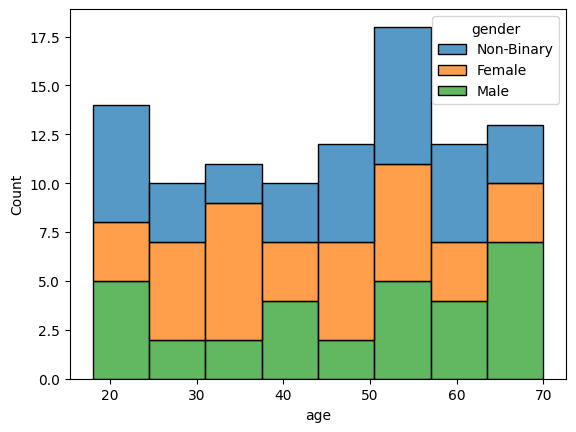

In [35]:
# Visualize the distribution of age by gender or country using **matplotlib** or **seaborn**.
# Seaborn 
sns.histplot(data=user_demographics, x='age', hue='gender', multiple='stack')

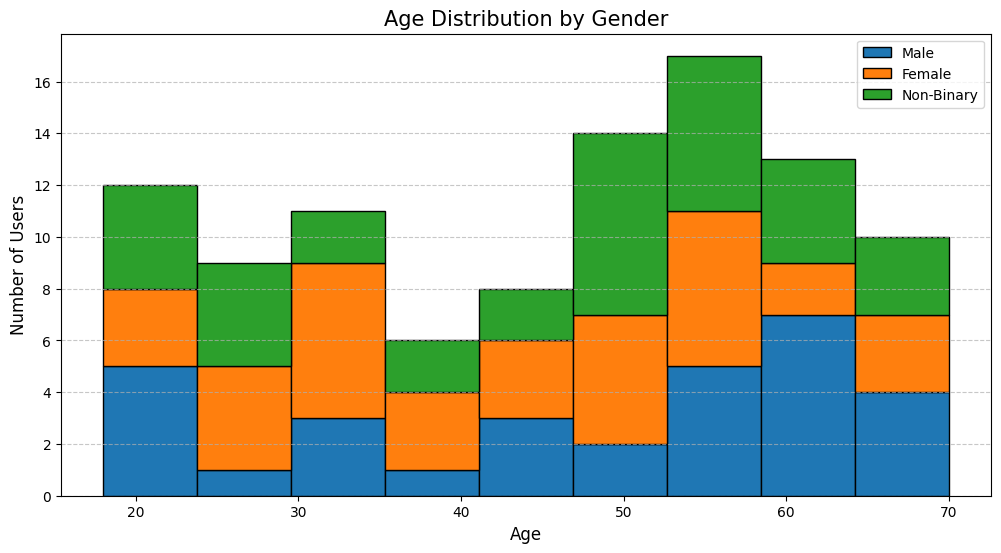

In [43]:
# Matplotlib
plt.figure(figsize=(12, 6))

# Define the bins
bins = np.linspace(user_demographics['age'].min(), user_demographics['age'].max(), 10)

# Separate data by gender
male_ages = user_demographics[user_demographics['gender'] == 'Male']['age']
female_ages = user_demographics[user_demographics['gender'] == 'Female']['age']
non_binary_ages = user_demographics[user_demographics['gender'] == 'Non-Binary']['age']

# Create stacked histogram
plt.hist([male_ages, female_ages, non_binary_ages], 
         bins=bins, 
         stacked=True, 
         label=['Male', 'Female', 'Non-Binary'],
         edgecolor='black')

plt.title('Age Distribution by Gender', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()